# Dữ liệu không loại bỏ các mẫu chứa trường có giá trị NA

In [1]:
import pandas as pd, seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Dưới đây là các hàm phục vụ việc tiền xử lý dữ liệu như one-hot coding hoặc chia tập train - validation

In [2]:
# Function to one-hot coding using get_dummies() method
def one_hot(matrix, column):
    type_dummies = pd.get_dummies(matrix[column], prefix='type')
    matrix.drop([column], axis=1, inplace=True)
    matrix = pd.concat([matrix, type_dummies], axis=1)
    return matrix


# Function to split the training set and validation set
def split_data(x_data, y_data, test_size):
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size=test_size,
                                                        random_state=42)
    return x_train, x_test, y_train, y_test

In [3]:
# Read data
# Change data path on your computer
data_path = 'earthquakes.csv'
data = pd.read_csv(data_path)
# Print the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   int64  
 6   updated          1137 non-null   int64  
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

In [4]:
# Print the data description
data.describe()

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,4.856675,1.712109e+12,1.716593e+12,414.408091,2.925242,4.320141,0.059807,432.698329,115.094107,1.342604,0.585974,55.055286,41.287300,27.308909,-3.930635,52.289358,83086.131980,21.741425
std,1.047840,1.143033e+10,9.671955e+09,5746.971362,2.562707,1.453949,0.237232,256.177844,91.877870,1.704364,0.308556,37.609237,87.866489,20.133139,118.043697,56.027469,12812.555204,440.864430
min,3.000000,1.687542e+12,1.693083e+12,0.000000,0.000000,1.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,3.800000,1.701663e+12,1.707609e+12,0.000000,0.000000,4.000000,0.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000,79331.000000,-360.000000
50%,5.300000,1.713810e+12,1.719958e+12,2.000000,3.000000,4.000000,0.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000,79772.000000,-180.000000
75%,5.600000,1.722885e+12,1.725384e+12,24.000000,5.000000,5.000000,0.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000,92530.000000,480.000000
max,7.600000,1.726661e+12,1.726672e+12,183786.000000,9.000000,9.000000,1.000000,2419.000000,619.000000,12.457000,2.520000,256.000000,639.503000,68.176100,179.972000,298.000000,99827.000000,780.000000


## Tiền xử lý dữ liệu

In [5]:
# Remove some features that aren't important for classify / clustering the alert of the earthquake
# Feature 'date' is already converted to float type in the original dataset 
data.drop(['id', 'date', 'title', 'url', 'detailUrl', 'ids', 'sources',
           'types', 'net', 'code', 'geometryType', 'status',
           'postcode', 'what3words', 'locationDetails'], axis=1, inplace=True)
# Replace Null value of column 'alert' to unknown 
data.fillna({'alert': 'unknown'}, inplace=True)

In [6]:
# NA-value columns will be filled by 'unknown' value
na_column = data.columns[data.isna().any()].tolist()

for column in na_column:
    data.fillna({column: 'unknown'}, inplace=True)

# String-value columns will be one-hot coding
string_columns = data.select_dtypes(include=['object']).columns.tolist()
string_columns.remove('alert')

for column in string_columns:
    one_hot(data, column)

x_data = data.drop(['alert'], axis=1)
x_data = StandardScaler().fit_transform(x_data)
y_data = data['alert']

data.head()

,magnitude,time,updated,felt,cdi,mmi,alert,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,timezone
0,4.8,1726534182289,1726583895255,1893,6,5,green,0,994,37,0.28700,0.48,70.0,4.0440,32.3984,-102.044,33,-300
1,5.1,1726534182183,1726672002991,2042,6,5,green,0,1040,24,0.00000,0.10,38.0,6.1279,32.4140,-102.057,34,-300
2,3.7,1726485728190,1726637414586,1580,4,4,unknown,0,591,135,0.03294,0.28,99.0,10.9000,34.0678,-118.807,6,-420
3,3.9,1726333266539,1726584426218,5,3,4,green,0,236,38,0.00000,0.10,65.0,6.2024,31.6470,-104.450,58,-300
4,4.1,1726333266382,1726334616179,4,3,4,green,0,260,28,0.04300,0.26,67.0,8.8140,31.6323,-104.473,60,-300


## Giảm chiều dữ liệu
### Phương pháp PCA

In [7]:
# Dimensionality reduction
# Using PCA method
pca = PCA(n_components=2, random_state=42)
x_data_pca = pca.fit_transform(x_data)

**Trực quan hóa dữ liệu**

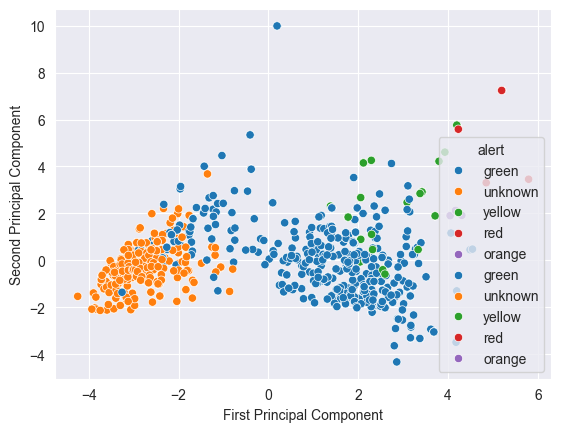

In [8]:
# Data visualization (2d scatter plot) 
pc1 = x_data_pca[:, 0]
pc2 = x_data_pca[:, 1]
sns.scatterplot(x=pc1, y=pc2, hue=y_data)
# Creat scatter plot
plot = sns.scatterplot(x=pc1, y=pc2, hue=y_data)
# Rename axis
plot.set(xlabel="First Principal Component", ylabel="Second Principal Component")
plt.show()

### Phương pháp LDA

In [9]:
# Dimensionality reduction
# Using LDA method
lda = LDA(n_components=2)
x_data_lda = lda.fit_transform(x_data, y_data)

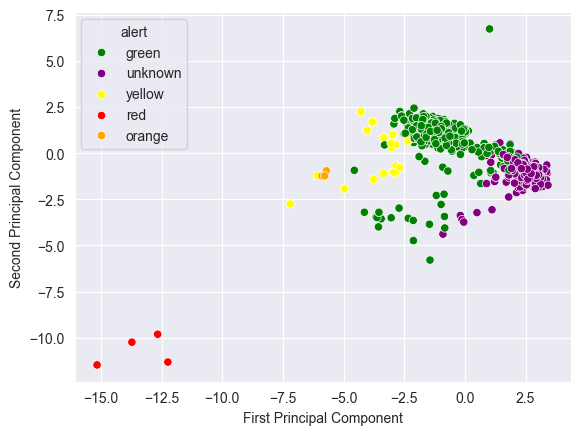

In [10]:
# Data visualization (2d scatter plot) 
pc1 = x_data_lda[:, 0]
pc2 = x_data_lda[:, 1]
# Creat scatter plot
custom_palette = {'red': "red", 'yellow': "yellow", 'green': "green", 'unknown': "purple", 'orange': "orange"}
plot_lda = sns.scatterplot(x=pc1, y=pc2, hue=y_data, palette=custom_palette)
# Rename axis
plot_lda.set(xlabel="First Principal Component", ylabel="Second Principal Component")
plt.show()

**Đánh giá các thành phần chính theo tham số thống kê** và **Xác định lượng thông tin được bảo tồn theo phương sai giải thích**

In [11]:
# Print the explained variance after reduce dimension of the data 
print(f'Explained variance: {np.cumsum(pca.explained_variance_)}')
# Print the statistic values of Principal Component
pd.DataFrame(data=x_data_pca,
             columns=['First Principal Component',
                      'Second Principal Component']).describe()

Explained variance: [5.79038133 8.00272516]


,First Principal Component,Second Principal Component
count,1.137000e+03,1.137000e+03
mean,-1.249855e-16,-5.624349e-17
std,2.406321e+00,1.487395e+00
min,-4.247917e+00,-4.320333e+00
25%,-2.592263e+00,-9.703910e-01
50%,8.249570e-01,-8.439121e-02
75%,2.114002e+00,7.183299e-01
max,5.793213e+00,9.984375e+00


**Thực hiện hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính**

<Figure size 1500x1000 with 0 Axes>

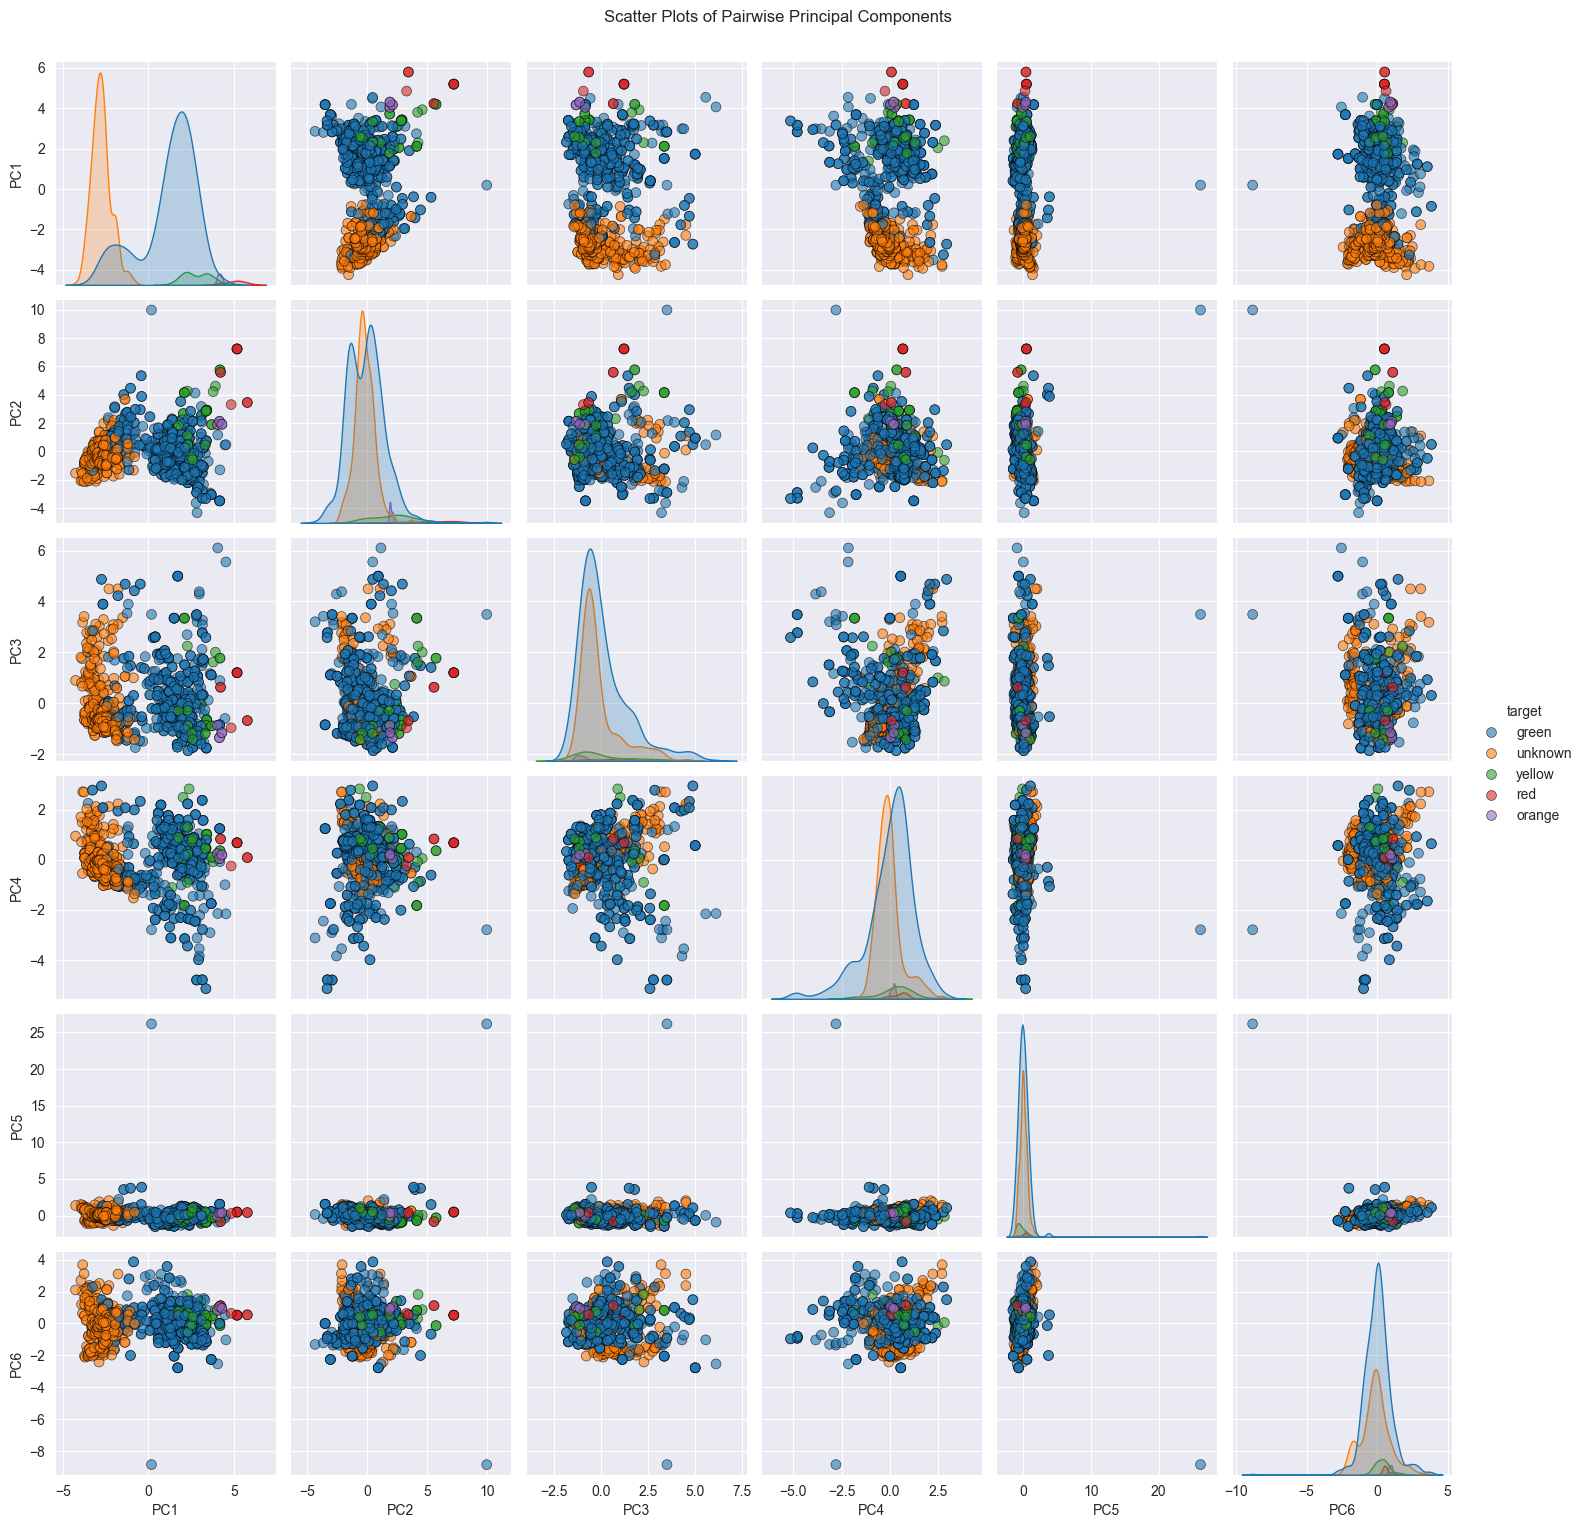

In [12]:
pca_pair = PCA(n_components=6)
X_pca = pca_pair.fit_transform(x_data)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i + 1}' for i in range(6)])
df_pca['target'] = y_data
plt.figure(figsize=(15, 10))
sns.pairplot(df_pca, hue='target', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
             vars=[f'PC{i + 1}' for i in range(6)])  # Sử dụng 4 thành phần chính
plt.suptitle("Scatter Plots of Pairwise Principal Components", y=1.02)
plt.show()

MÔ HÌNH HỒI QUY SOFTMAX VỚI DỮ LIỆU GỐC

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

def softmax_original_data(x_data, y_data, test_size):
    x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size)
    
    # Multinomial Logistic Regression
    start_time_train = time.time()
    lorg = LogisticRegression(max_iter=5000, solver='saga')
    lorg.fit(x_train, y_train)
    end_time_train = time.time()
    time_training = end_time_train - start_time_train
    print("Time training original data with softmax model: ", time_training)
    
    # Prediction
    y_pred = lorg.predict(x_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of original data: ", accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    print("Precision of original data: ", precision)
    # Recall
    recall = recall_score(y_test, y_pred, average='macro')
    print("Recall of original data: ", recall)
    

DỮ LIỆU GIẢM CHIỀU PCA

In [32]:
def softmax_pca_data(x_data_pca, y_data, test_size):
    x_pca_train, x_pca_test, y_pca_train, y_pca_test = split_data(x_data_pca, y_data, test_size)
    
    # Multinomial Logistic Regression
    start_time_train = time.time()
    lorg = LogisticRegression(max_iter=5000, solver='saga')
    lorg.fit(x_pca_train, y_pca_train)
    end_time_train = time.time()
    time_training = end_time_train - start_time_train
    print("\nTime training PCA data with softmax model: ", time_training)
    
    # Prediction
    y_pred_pca = lorg.predict(x_pca_test)
    
    # Accuracy
    accuracy = accuracy_score(y_pca_test, y_pred_pca)
    print("Accuracy after PCA: ", accuracy)
    # Precision
    precision = precision_score(y_pca_test, y_pred_pca, average='macro', zero_division=1)
    print("Precision after PCA: ", precision)
    # Recall
    recall = recall_score(y_pca_test, y_pred_pca, average='macro')
    print("Recall after PCA: ", recall)

DỮ LIỆU GIẢM CHIỀU LDA

In [33]:
def softmax_lda_data(x_data_lda, y_data, test_size):
    x_lda_train, x_lda_test, y_lda_train, y_lda_test = split_data(x_data_lda, y_data, test_size)
    
    # Multinomial Logistic Regression
    start_time_train = time.time()
    lorg = LogisticRegression(max_iter=5000, solver='saga')
    lorg.fit(x_lda_train, y_lda_train)
    end_time_train = time.time()
    time_training = end_time_train - start_time_train
    print("\nTime training LDA data with softmax model: ", time_training)
    
    # Prediction
    y_pred_pca = lorg.predict(x_lda_test)
    
    # Accuracy
    accuracy = accuracy_score(y_lda_test, y_pred_pca)
    print("Accuracy after LDA: ", accuracy)
    # Precision
    precision = precision_score(y_lda_test, y_pred_pca, average='macro', zero_division=1)
    print("Precision after LDA: ", precision)
    # Recall
    recall = recall_score(y_lda_test, y_pred_pca, average='macro')
    print("Recall after LDA: ", recall)

In [34]:
# Test_size = 0.2
print("**************************** Train : Validation = 4 : 1 **********************************")
softmax_original_data(x_data, y_data, 0.2)
softmax_pca_data(x_data_pca, y_data, 0.2)
softmax_lda_data(x_data_lda, y_data, 0.2)

# Test_size = 0.3
print("\n**************************** Train : Validation = 7 : 3 **********************************")
softmax_original_data(x_data, y_data, 0.3)
softmax_pca_data(x_data_pca, y_data, 0.3)
softmax_lda_data(x_data_lda, y_data, 0.3)

# Test_size = 0.4
print("\n**************************** Train : Validation = 6 : 4 **********************************")
softmax_original_data(x_data, y_data, 0.4)
softmax_pca_data(x_data_pca, y_data, 0.4)
softmax_lda_data(x_data_lda, y_data, 0.4)

**************************** Train : Validation = 4 : 1 **********************************
Time training original data with softmax model:  0.6610870361328125
Accuracy of original data:  0.956140350877193
Precision of original data:  0.98187414500684
Recall of original data:  0.9325355978727053

Time training PCA data with softmax model:  0.2845883369445801
Accuracy after PCA:  0.9122807017543859
Precision after PCA:  0.8199403239556693
Recall after PCA:  0.621161434208269

Time training LDA data with softmax model:  0.21381211280822754
Accuracy after LDA:  0.9385964912280702
Precision after LDA:  0.878994032395567
Recall after LDA:  0.6802367472979928

**************************** Train : Validation = 7 : 3 **********************************
Time training original data with softmax model:  0.2630336284637451
Accuracy of original data:  0.9619883040935673
Precision of original data:  0.9850051352276618
Recall of original data:  0.9504925301690473

Time training PCA data with softmax mo

### 1. Các chỉ số của mô hình
#### Dữ liệu gốc:

Đạt kết quả tốt nhất về accuracy (~96%), precision (~96-98%), và recall (~94-95%), cho thấy mô hình rất tin cậy:
- Accuracy: Phát hiện chính xác phần lớn các trường hợp, chỉ có 3-4% sai lệch.
- Precision: Cảnh báo đưa ra rất đáng tin, với tỷ lệ báo động giả (false positives) rất thấp.
- Recall: Vẫn bỏ sót 5-6% mẫu động đất tiềm năng (false negatives), cần cải thiện để đảm bảo an toàn.

#### Dữ liệu PCA:

- Giảm thời gian xử lý nhưng làm mất nhiều thông tin quan trọng:
Recall thấp (~62-68%), nhiều động đất tiềm năng bị bỏ sót.
- Precision cũng giảm, gây ra các cảnh báo không chính xác.

#### Dữ liệu LDA:

- Hiệu quả hơn PCA với accuracy (93-95%) và recall (68-72%):
- Duy trì cân bằng giữa tốc độ và chất lượng, phù hợp nếu cần một giải pháp nhanh nhưng không đạt độ chính xác cao như dữ liệu gốc.

### 2. Tỷ lệ Train : Validation tốt nhất là 6:4

- Cho hiệu suất tốt nhất với dữ liệu gốc (accuracy ~96.26%, precision ~96.06%, recall ~94.10%), đồng thời thời gian training ngắn nhất.
- Cân bằng tốt giữa dữ liệu huấn luyện và kiểm tra, giúp mô hình tổng quát hóa tốt hơn so với tỷ lệ 7:3.

### 3. Những điểm cần cải thiện
- Recall cho dữ liệu gốc:

Điều chỉnh trọng số giữa Precision và Recall bằng cách sử dụng f1-score làm thước đo tối ưu.
Sử dụng augmentation dữ liệu hoặc thử nghiệm các thuật toán nâng cao như ensemble learning.

- Hiệu suất của PCA:

Điều chỉnh số chiều giảm bằng phương pháp như scree plot để giữ lại thông tin quan trọng hơn.

- LDA và tốc độ:

Kết hợp LDA với các thuật toán khác (hybrid models) hoặc thêm các đặc trưng phi tuyến tính để cải thiện recall (~72%).

### 4. Kết luận
- Phương án tốt nhất:

Dữ liệu gốc với tỷ lệ 6:4 là lựa chọn tối ưu, đạt hiệu suất cao nhất và cân bằng giữa độ chính xác, độ nhạy, và tốc độ.

- Phương án thay thế:

Nếu cần xử lý nhanh, LDA với tỷ lệ 6:4 là lựa chọn khả thi, nhưng cần lưu ý khả năng bỏ sót một số cảnh báo.

- Hướng cải thiện:

Tập trung nâng cao recall để giảm nguy cơ bỏ sót động đất tiềm năng, đặc biệt với dữ liệu gốc.
Kết hợp các kỹ thuật giảm chiều với các thuật toán học sâu hoặc phi tuyến để cải thiện hiệu suất tổng thể.